In [2]:
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
def T2decay(xdata, T1, Mz):
    R1 = 1.0/T1
    return Mz * np.exp(-xdata*R1)

def plot(xdata, ydata1, ydata2):
    plt.plot(xdata, ydata1)
    plt.scatter(xdata,ydata2,color = 'r')
    plt.show()

In [9]:
Npoints = 20
TR = np.linspace(0, 0.2, Npoints)
T2 = 0.050
Mz = 1.0
Signal = T2decay(TR, T2, Mz)

In [10]:
mu = 0.0; sigma = 0.1;
Signal_with_noise = Signal + np.random.normal(mu, sigma, Npoints)

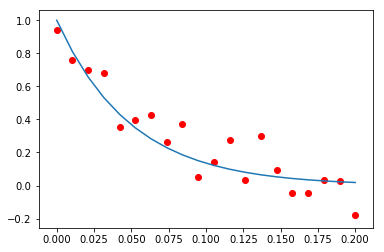

In [11]:
# plot estimated data
plot(TR, Signal, Signal_with_noise)

In [22]:
# perform non-linear curve fitting with bounds
# using SciPy
# https://docs.scipy.org/doc/scipy/references/generated/scipy.optimize.curve_fit.html
initial_guess = [100,100]
pars_hat, cov = curve_fit(T2decay, TR, Signal_with_noise, p0=initial_guess, bounds=(0, 100))
print(pars_hat)

[ 0.06061701  0.95525725]


In [23]:
# estimate yhat
Yhat = T2decay(TR, pars_hat[0], pars_hat[1])

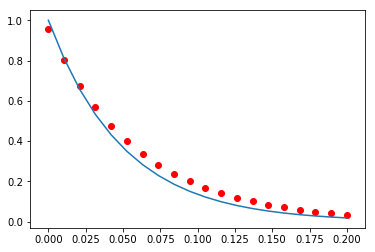

In [24]:
# plot estimated data
plot(TR, Signal, Yhat)